In [1]:
import pandas as pd
import math
import time
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix 
import patsy
from patsy import dmatrices,dmatrix
from sklearn import model_selection
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn import preprocessing, tree, ensemble, linear_model, metrics, model_selection, svm
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

/Users/user/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df1=pd.read_csv('diab_models.csv')

In [3]:
df1.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,code,code1,code2,code3
0,0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,...,No,No,No,No,No,NO,diabetes,diabetes,Undefined,Undefined
1,1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,...,No,No,No,Ch,Yes,>30,neoplasm,neoplasm,diabetes,neoplasm
2,2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,...,No,No,No,No,Yes,NO,other,other,diabetes,Undefined
3,3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,...,No,No,No,Ch,Yes,NO,Undefined,Undefined,diabetes,circulatory
4,4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,...,No,No,No,Ch,Yes,NO,neoplasm,neoplasm,neoplasm,diabetes


In [151]:
# del df1['code']

In [4]:
df1.columns

Index([u'Unnamed: 0', u'encounter_id', u'patient_nbr', u'race', u'gender',
       u'age', u'admission_type_id', u'discharge_disposition_id',
       u'admission_source_id', u'time_in_hospital', u'medical_specialty',
       u'num_lab_procedures', u'num_procedures', u'num_medications',
       u'number_outpatient', u'number_emergency', u'number_inpatient',
       u'diag_1', u'diag_2', u'diag_3', u'number_diagnoses', u'max_glu_serum',
       u'A1Cresult', u'metformin', u'repaglinide', u'nateglinide',
       u'chlorpropamide', u'glimepiride', u'acetohexamide', u'glipizide',
       u'glyburide', u'tolbutamide', u'pioglitazone', u'rosiglitazone',
       u'acarbose', u'miglitol', u'troglitazone', u'tolazamide', u'examide',
       u'citoglipton', u'insulin', u'glyburide-metformin',
       u'glipizide-metformin', u'glimepiride-pioglitazone',
       u'metformin-rosiglitazone', u'metformin-pioglitazone', u'change',
       u'diabetesMed', u'readmitted', u'code', u'code1', u'code2', u'code3'],
      

In [5]:
df1.readmitted.value_counts()

NO     52537
>30    35502
<30    11314
Name: readmitted, dtype: int64

In [6]:
df1['readmit']=df1['readmitted']

In [7]:
df1['readmit'] = df1['readmit'].replace('NO',0)
df1['readmit'] = df1['readmit'].replace('>30',0)
df1['readmit'] = df1['readmit'].replace('<30',1)

In [8]:
df1.readmit.value_counts()

0    88039
1    11314
Name: readmit, dtype: int64

In [11]:
X=dmatrix('~ C(gender)+C(age)+ C(race)+(admission_source_id)+(discharge_disposition_id)+C(medical_specialty)+(time_in_hospital)+C(A1Cresult)',df1, return_type='dataframe')

In [12]:
# #to convert the target to a numeric variable
# def readmit(c):
#   if c['readmitted'] == '<30':
#     return '1'
  
#   else:
#     return '0'

# df1['readmit'] = df1.apply(readmit, axis=1)

In [13]:
# del df1.readmit

In [14]:
y=df1['readmit']

## Logistic Regression

In [15]:
logreg=LogisticRegression()
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
logreg.score(X,y)

0.88611315209404851

In [17]:
coef_df = pd.DataFrame(X.columns)
coef_df.columns=['Variables']
coef_df['Coeff']=pd.Series(logreg.coef_[0])
coef_df['Odds_ratio_for_survival']=pd.Series(np.exp(logreg.coef_[0]))
coef_df

,Variables,Coeff,Odds_ratio_for_survival
0,Intercept,-1.497173,0.223762
1,C(gender)[T.Male],0.009372,1.009416
2,C(gender)[T.Unknown/Invalid],-0.234649,0.790849
3,C(age)[T.[10-20)],-0.107177,0.898366
4,C(age)[T.[20-30)],0.673184,1.960470
5,C(age)[T.[30-40)],0.333922,1.396434
6,C(age)[T.[40-50)],0.234177,1.263869
7,C(age)[T.[50-60)],0.119433,1.126858
8,C(age)[T.[60-70)],0.257793,1.294070
9,C(age)[T.[70-80)],0.300162,1.350078


In [76]:
# sm.Logit(y, X).fit().summary()

## Train test split

In [157]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3, random_state=42)
logreg.fit(X,y)
logreg.score(Xtest,ytest)

0.8888478829765819

In [165]:
ypred=logreg.predict(Xtest)

In [166]:
# ypred1=logreg.predict_proba(Xtest)[:,1]

In [167]:
print classification_report(ytest,ypred)

             precision    recall  f1-score   support

          0       0.89      1.00      0.94     26494
          1       0.00      0.00      0.00      3312

avg / total       0.79      0.89      0.84     29806



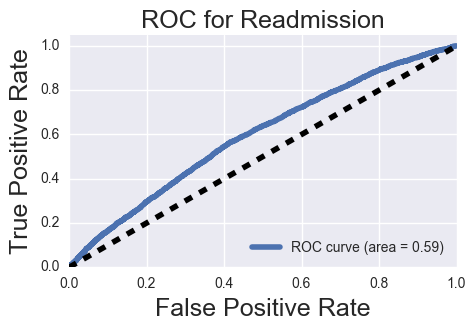

In [168]:
y_score = logreg.predict_proba(Xtest)[:,1]

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], thresholds = roc_curve(ytest, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[5,3])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for Readmission', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [170]:
ypred = logreg.predict(X)

conmat = np.array(confusion_matrix(y, ypred))

confusion = pd.DataFrame(conmat, index=['act_no_readmit', 'act_readmit'],columns=['predi_no_readmit', 'pred_readmit'])

print(confusion)

                predi_no_readmit  pred_readmit
act_no_readmit             88038             1
act_readmit                11314             0


In [171]:
# thresholds for TPR of 80%, 85%, 90%, 95%, and 100%
thresh = [[th for t, f, th in zip(TPR[1], FPR[1], thresholds) if t >= i][0] for i in [.8, .85, .9, .95, 1]]

In [172]:
thresh

[0.10004074572779954,
 0.095002102352791565,
 0.090064790108309853,
 0.079565498714302713,
 0.035953305512051177]

In [173]:
yscore=logreg.predict_proba(X)[:,1]

In [174]:
# Print classification reports for each threshold corresponding to the TPRs above.
for i in thresh:
    predictions = [1 if p >= i else 0 for p in yscore]
    print 'threshold:', i
    print metrics.classification_report(y, predictions)
    print ''

threshold: 0.100040745728
             precision    recall  f1-score   support

          0       0.92      0.31      0.47     88039
          1       0.13      0.80      0.22     11314

avg / total       0.83      0.37      0.44     99353


threshold: 0.0950021023528
             precision    recall  f1-score   support

          0       0.93      0.25      0.39     88039
          1       0.13      0.85      0.22     11314

avg / total       0.84      0.32      0.37     99353


threshold: 0.0900647901083
             precision    recall  f1-score   support

          0       0.93      0.18      0.31     88039
          1       0.12      0.90      0.22     11314

avg / total       0.84      0.27      0.30     99353


threshold: 0.0795654987143
             precision    recall  f1-score   support

          0       0.94      0.10      0.18     88039
          1       0.12      0.95      0.21     11314

avg / total       0.85      0.20      0.18     99353


threshold: 0.0359533055121
  

In [175]:
# Print confusion matrix for each threshold corresponding to the TPRs above.
for i in thresh:
    predictions = [1 if p >= i else 0 for p in yscore]
    print 'threshold:', i
    print metrics.confusion_matrix(y, predictions)
    print metrics.classification_report(y,predictions)
    print ''

threshold: 0.100040745728
[[27471 60568]
 [ 2288  9026]]
             precision    recall  f1-score   support

          0       0.92      0.31      0.47     88039
          1       0.13      0.80      0.22     11314

avg / total       0.83      0.37      0.44     99353


threshold: 0.0950021023528
[[21928 66111]
 [ 1707  9607]]
             precision    recall  f1-score   support

          0       0.93      0.25      0.39     88039
          1       0.13      0.85      0.22     11314

avg / total       0.84      0.32      0.37     99353


threshold: 0.0900647901083
[[16266 71773]
 [ 1179 10135]]
             precision    recall  f1-score   support

          0       0.93      0.18      0.31     88039
          1       0.12      0.90      0.22     11314

avg / total       0.84      0.27      0.30     99353


threshold: 0.0795654987143
[[ 8821 79218]
 [  565 10749]]
             precision    recall  f1-score   support

          0       0.94      0.10      0.18     88039
          1   

In [178]:
ypred = logreg.predict(Xtest)
yscore=logreg.fit(Xtrain, ytrain).decision_function(Xtest)
fpr, tpr,thresholds=metrics.roc_curve(ypred, yscore,pos_label=1.0)

/Users/user/anaconda/lib/python2.7/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [179]:
def evaluate_threshold(threshold):
    print('TPR:',tpr[thresholds>threshold][-1])
    print('FPR:',fpr[thresholds>threshold][-1])

In [180]:
for i in np.arange(min(thresholds),max(thresholds),0.5):
    print('Threshold:'),i
    evaluate_threshold(i)
    print

Threshold: -4.11857725423
('TPR:', nan)
('FPR:', 0.99979869824867473)

Threshold: -3.61857725423
('TPR:', nan)
('FPR:', 0.99805408307052268)

Threshold: -3.11857725423
('TPR:', nan)
('FPR:', 0.99406159833590557)

Threshold: -2.61857725423
('TPR:', nan)
('FPR:', 0.96071260819969129)

Threshold: -2.11857725423
('TPR:', nan)
('FPR:', 0.58565389518888811)

Threshold: -1.61857725423
('TPR:', nan)
('FPR:', 0.067771589612829627)

Threshold: -1.11857725423
('TPR:', nan)
('FPR:', 0.0026169227672280747)

Threshold: -0.618577254229
('TPR:', nan)
('FPR:', 3.3550291887539423e-05)

Threshold: -0.118577254229
('TPR:', nan)
('FPR:', 3.3550291887539423e-05)

Threshold: 0.381422745771
('TPR:', nan)
('FPR:', 0.0)

Threshold: 0.881422745771
('TPR:', nan)
('FPR:', 0.0)



## Model Selection

In [28]:
# non categorical features
features = ['age','race','gender','max_glu_serum','A1Cresult','insulin','change','diabetesMed', 'code1','code2']
for c in features:
    values = df1[c].value_counts()
    print("{} \n {}".format(c,values))

age 
 [70-80)     25335
[60-70)     22062
[50-60)     17060
[80-90)     16436
[40-50)      9607
[30-40)      3764
[90-100)     2590
[20-30)      1649
[10-20)       690
[0-10)        160
Name: age, dtype: int64
race 
 Caucasian          74229
AfricanAmerican    18772
?                   2234
Hispanic            2017
Other               1472
Asian                629
Name: race, dtype: int64
gender 
 Female             53459
Male               45891
Unknown/Invalid        3
Name: gender, dtype: int64
max_glu_serum 
 None    94200
Norm     2546
>200     1419
>300     1188
Name: max_glu_serum, dtype: int64
A1Cresult 
 None    82518
>8       8137
Norm     4923
>7       3775
Name: A1Cresult, dtype: int64
insulin 
 No        46386
Steady    30070
Down      11908
Up        10989
Name: insulin, dtype: int64
change 
 No    53229
Ch    46124
Name: change, dtype: int64
diabetesMed 
 Yes    76725
No     22628
Name: diabetesMed, dtype: int64
code1 
 circulatory        29733
respiratory        13977
n

In [114]:
df1.code1.value_counts()

1    29733
9    13977
7    11049
3     9400
2     8676
5     6928
8     6804
4     5003
6     4935
0     2848
Name: code1, dtype: int64

In [31]:
#label encoder
le = preprocessing.LabelEncoder()
features = ['age','race','gender','max_glu_serum','A1Cresult','insulin','change','diabetesMed', 'code1','code2']
for c in features:
    df1[c] = le.fit_transform(df1[c])

In [111]:
# df1.to_csv('df1_clean.csv')

In [110]:
df1.max_glu_serum.value_counts()

2    94200
3     2546
0     1419
1     1188
Name: max_glu_serum, dtype: int64

In [33]:
X1=df1[['race','gender','age','admission_type_id','discharge_disposition_id',
     'admission_source_id','time_in_hospital','num_lab_procedures',
     'num_procedures','num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses', 'max_glu_serum',
       'A1Cresult','insulin','change',
       'diabetesMed','code1', 'code2']]

In [34]:
y1=df1['readmit']

In [35]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X1,y1,test_size=0.3, random_state=42)

In [103]:
#Decision Tree
st = time.time()
print "training started"
dtree = tree.DecisionTreeClassifier()
dtree.fit(Xtrain, ytrain)
print "training ended"
predict = dtree.predict_proba(Xtest)
print dtree.score(Xtest,ytest)
print metrics.roc_auc_score(ytest, predict[:,1])
et = time.time()
tt = et - st
print('tt:',tt)


training started
training ended
0.789740320741
0.529036995524
('tt:', 0.6658518314361572)


In [37]:
#Random Forrest
st = time.time()
print "training started"
clf = ensemble.RandomForestClassifier(n_jobs=-1, n_estimators=500)
clf.fit(Xtrain, ytrain)
print "training ended"

predict = clf.predict_proba(Xtest)
print clf.score(Xtest,ytest)
print metrics.roc_auc_score(ytest, predict[:,1])
et = time.time()
tt = et - st
print "Total Time = " + str(tt)

training started
training ended
0.888982084144
0.64695063922
Total Time = 30.9940299988



In [66]:
#AdaBoost
st = time.time()
print "training started"
ada = ensemble.AdaBoostClassifier(n_estimators=100)
ada.fit(Xtrain, ytrain)
print "training ended"
et = time.time()
tt = et - st
predict = ada.predict_proba(Xtest)
print ada.score(Xtest,ytest)
print metrics.roc_auc_score(ytest, predict[:,1])
# print metrics.confusion_matrix(ytest,predict[:,1])
# print metrics.classification_report(ytest,predict[:,1])
et = time.time()
tt = et - st
print "Total Time = " + str(tt)

training started
training ended
0.888411729182
0.66183983435
Total Time = 6.21651101112


In [39]:
#Extra Trees
et = tree.ExtraTreeClassifier()
et.fit(Xtrain, ytrain)
predict = dtree.predict_proba(Xtest)
print et.score(Xtest,ytest)
metrics.roc_auc_score(ytest, predict[:,1])
metrics.confusion_matrix(ytest,predict[:,1])

0.800241562102


array([[22874,  3620],
       [ 2665,   647]])

In [57]:
# gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
st = time.time()
print "training started"
gb = GradientBoostingClassifier()
gb.fit(Xtrain, ytrain)
print "training ended"
predict = gb.predict_proba(Xtest)
print gb.score(Xtest,ytest)
print metrics.roc_auc_score(ytest, predict[:,1])

et = time.time()
tt = et - st
print "Total Time = " + str(tt)

training started
training ended
0.889116285312
0.665829013469
Total Time = 8.31786704063



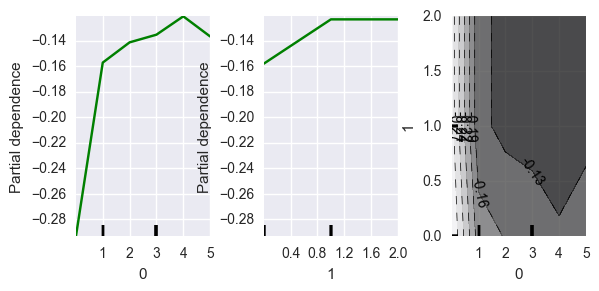

In [61]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
features = [0, 1, (0, 1)]
fig, axs = plot_partial_dependence(gb, X1, features) 

In [58]:
# gradient boosting with warm start
from sklearn.ensemble import GradientBoostingClassifier
st = time.time()
print "training started"
gb = GradientBoostingClassifier(n_estimators=400,warm_start=True )
gb.fit(Xtrain, ytrain)
print "training ended"
predict = gb.predict_proba(Xtest)
print gb.score(Xtest,ytest)
print metrics.roc_auc_score(ytest, predict[:,1])

et = time.time()
tt = et - st
print "Total Time = " + str(tt)

training started
training ended
0.889317587063
0.667814736743
Total Time = 31.9547979832



In [52]:
from sklearn.neural_network import MLPClassifier
st = time.time()
print "training started"
nn = MLPClassifier()
nn.fit(Xtrain, ytrain)
print "training ended"
predict = nn.predict_proba(Xtest)
print nn.score(Xtest,ytest)
print metrics.roc_auc_score(ytest, predict[:,1])

et = time.time()
tt = et - st
print "Total Time = " + str(tt)

training started
training ended
0.889149835604
0.648670527763
Total Time = 7.25472998619



In [55]:
st = time.time()
print "training started"
sgd = linear_model.SGDClassifier(loss='log')
sgd.fit(Xtrain, ytrain)
print "training ended"
predict = sgd.predict_proba(Xtest)
print sgd.score(Xtest,ytest)
print metrics.roc_auc_score(ytest, predict[:,1])

et = time.time()
tt = et - st
print "Total Time = " + str(tt)

training started
training ended
0.888210427431
0.555183969281
Total Time = 0.127579927444


In [63]:
st = time.time()
print "training started"
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)
print "training ended"
predict = gnb.predict_proba(Xtest)
print gnb.score(Xtest,ytest)
print metrics.roc_auc_score(ytest, predict[:,1])

et = time.time()
tt = et - st
print "Total Time = " + str(tt)

training started
training ended
0.859021673489
0.635214417338
Total Time = 0.0969870090485


In [ ]:
# st = time.time()
# print "training started"
# svm = SVC()
# svm.fit(Xtrain,ytrain)
# print "training ended"
# predict = svm.predict_proba(Xtest)
# print svm.score(Xtest,ytest)
# print metrics.roc_auc_score(ytest, predict[:,1])

# et = time.time()
# tt = et - st
# print "Total Time = " + str(tt) + "\n"

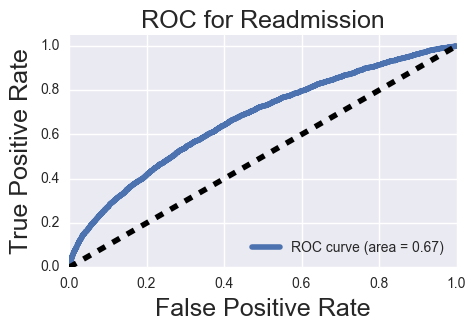

In [59]:
y_score = gb.predict_proba(Xtest)[:,1]

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], thresholds = roc_curve(ytest, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[5,3])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for Readmission', fontsize=18)
plt.legend(loc="lower right")
plt.show()

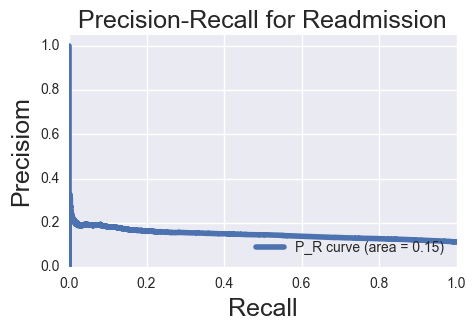

In [91]:
# # precision recall curve

# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import average_precision_score


# y_score = gb.predict_proba(X1)[:,1]

# precision = dict()
# recall = dict()
# average_precision = dict()
# precision[0], recall[0], _ = precision_recall_curve(y1,yscore)
# average_precision[0] = average_precision_score(y1, yscore,average="micro")

# # # For class 1, find the area under the curve
# # FPR[1], TPR[1], thresholds = roc_curve(ytest, y_score)
# # ROC_AUC[1] = auc(FPR[1], TPR[1])

# # Plot of a ROC curve for class 1 (has_cancer)
# plt.figure(figsize=[5,3])
# plt.plot(recall[0], precision[0], label ='P_R curve (area = %0.2f)' % average_precision[0], linewidth=4)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('Recall', fontsize=18)
# plt.ylabel('Precisiom', fontsize=18)
# plt.title('Precision-Recall for Readmission', fontsize=18)
# plt.legend(loc="lower right")
# plt.show()

In [43]:
print pd.DataFrame(ada.feature_importances_, index=Xtrain.columns).sort_values(by=0, ascending=False)

                             0
discharge_disposition_id  0.15
num_medications           0.11
number_inpatient          0.10
num_lab_procedures        0.09
age                       0.08
code1                     0.06
time_in_hospital          0.06
number_outpatient         0.04
number_emergency          0.04
number_diagnoses          0.04
code2                     0.04
admission_type_id         0.04
num_procedures            0.03
admission_source_id       0.02
max_glu_serum             0.02
A1Cresult                 0.02
insulin                   0.02
gender                    0.01
change                    0.01
diabetesMed               0.01
race                      0.01


In [49]:
importances = pd.DataFrame(zip(dtree.fit(X1,y1).feature_importances_,
                               clf.fit(X1,y1).feature_importances_,
                               
                               ada.fit(X1,y1).feature_importances_,
                               gb.fit(X1,y1).feature_importances_),
                           index=X1.columns,
                           columns=['dtree_importance',
                                    'rf_importance',
                                    'ada_importance','gb_importance']).sort_values('rf_importance',
                                                                   ascending=False)


In [50]:
importances

,dtree_importance,rf_importance,ada_importance,gb_importance
num_lab_procedures,0.159764,0.139954,0.07,0.054639
num_medications,0.132334,0.116060,0.07,0.066104
time_in_hospital,0.076266,0.077166,0.05,0.050494
code2,0.068472,0.069911,0.02,0.024713
code1,0.065454,0.066490,0.06,0.053257
age,0.064431,0.063404,0.07,0.045323
num_procedures,0.051777,0.054183,0.02,0.011689
number_inpatient,0.032728,0.049242,0.13,0.208637
number_diagnoses,0.047234,0.048163,0.06,0.052639
discharge_disposition_id,0.031772,0.043358,0.15,0.206216


In [80]:
#http://www.kdnuggets.com/2016/02/ensemble-methods-techniques-produce-improved-machine-learning.html
# train = load_csv("train.csv")
# target = train["target"]
# train = train.drop("target")
# test = load_csv("test.csv")
# predictions = np.matrix(row_length=len(y1), column_length=len(algorithms)

# def model_store(alg):
#     predict =[]
#     for model in algorithms:
#         predict.append(model.fit(Xtrain,ytrain).predict_proba(Xtest))
#         return predict
# algorithms = [dtree,et,gb] #for classification
# model_store(algorithms)

In [40]:
df2 = df1.copy()

In [44]:
df2.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,code,not_readmit,readmit
0,0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,...,No,No,No,No,No,No,not_readmitted,diabetes,1,0
1,1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,...,No,No,No,No,Ch,Yes,not_readmitted,neoplasm,1,0
2,2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,...,No,No,No,No,No,Yes,not_readmitted,other,1,0
3,3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,...,No,No,No,No,Ch,Yes,not_readmitted,Undefined,1,0
4,4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,...,No,No,No,No,Ch,Yes,not_readmitted,neoplasm,1,0


In [109]:
(df2.readmit.value_counts())/len(df2)

0    0.886123
1    0.113877
Name: readmit, dtype: float64

In [ ]:
#missing values were imputed
# df2.race = df1['race'].replace('?','missing')
# df2.gender = df1['gender'].replace('Unknown/Invalid','Male')

In [ ]:
# X=dmatrix('~ C(gender)+C(age)+ C(race)+(time_in_hospital)+C(A1Cresult)',df1, return_type='dataframe')
# y=df1['readmit'].astype(int)

In [66]:
le = preprocessing.LabelEncoder()
df2['age'] = le.fit_transform(df2.age)
df2['race'] = le.fit_transform(df2.race)
df2['gender'] = le.fit_transform(df2.gender)
df2['A1Cresult'] = le.fit_transform(df2.A1Cresult)
df2['medical_specialty'] = le.fit_transform(df2.medical_specialty)
df2['code'] = le.fit_transform(df2.code)
df2['admission_source_id'] = le.fit_transform(df2.admission_source_id)


In [115]:
#label encoder
le = preprocessing.LabelEncoder()
features = ['age','race','gender','A1Cresult','medical_specialty','code','admission_source_id']
for c in features:
    df2[c] = le.fit_transform(df2[c])

In [116]:
df2.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,code,not_readmit,readmit
0,0,2278392,8222157,2,0,0,6,25,0,1,...,No,No,No,No,No,No,not_readmitted,2,1,0
1,1,149190,55629189,2,0,1,1,1,6,3,...,No,No,No,No,Ch,Yes,not_readmitted,7,1,0
2,2,64410,86047875,0,0,2,1,1,6,2,...,No,No,No,No,No,Yes,not_readmitted,8,1,0
3,3,500364,82442376,2,1,3,1,1,6,2,...,No,No,No,No,Ch,Yes,not_readmitted,0,1,0
4,4,16680,42519267,2,1,4,1,1,6,1,...,No,No,No,No,Ch,Yes,not_readmitted,7,1,0


In [69]:
# df2.admission_source_id.value_counts()

In [67]:
df2.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,code,not_readmit,readmit
0,0,2278392,8222157,2,0,0,6,25,0,1,...,No,No,No,No,No,No,not_readmitted,2,1,0
1,1,149190,55629189,2,0,1,1,1,6,3,...,No,No,No,No,Ch,Yes,not_readmitted,7,1,0
2,2,64410,86047875,0,0,2,1,1,6,2,...,No,No,No,No,No,Yes,not_readmitted,8,1,0
3,3,500364,82442376,2,1,3,1,1,6,2,...,No,No,No,No,Ch,Yes,not_readmitted,0,1,0
4,4,16680,42519267,2,1,4,1,1,6,1,...,No,No,No,No,Ch,Yes,not_readmitted,7,1,0


In [112]:
# df2.to_csv('diab_models_le.csv')

In [ ]:
X=df2[['gender','age','race','A1Cresult','medical_specialty','code','admission_source_id']]
y=df2['readmit']

In [92]:
X=df2[['gender','age','race','A1Cresult','medical_specialty','code','admission_source_id']]
y=df2['readmit']

In [93]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3, random_state=42)

In [94]:
# to run multiple models
def model_summary(model, X, y):
    cv = model_selection.StratifiedKFold(shuffle=True, n_splits=5)
    scores = model_selection.cross_val_score(model, X, y, cv=cv)
    print 'mean cross-val accuracy score: ', scores.mean(), "+/-", scores.std()
    
    y_pred = model_selection.cross_val_predict(model, X, y, cv=cv)
   
    print metrics.classification_report(y, y_pred)
    
    y_score = model_selection.cross_val_predict(model, X, y, method='predict_proba')[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y, y_score)
    print 'AUC:', metrics.auc(fpr, tpr)

In [182]:
models=[dtree,clf,ada,et,gb,nn,logreg]

In [183]:
for model in models:
    model_summary(model, X, y)    

NameError: name 'model_summary' is not defined

In [67]:
#Cross-validated scores
cv = model_selection.StratifiedKFold(shuffle=True, n_splits=5)
for model, name in zip([dtree,clf, ada,gb,nn], ['dtree','clf', 'ada', 'et','gb','nn']):
    score = model_selection.cross_val_score(model, X1, y1, cv=cv, scoring='roc_auc')
    print name, score.mean(), '+/-', score.std()

dtree 0.525046173121 +/- 0.00598887090212
clf 0.553039416817 +/- 0.0020934399428
ada 0.603807944416 +/- 0.00718103181598
et 0.608966906296 +/- 0.00338628706097
gb 0.595018454465 +/- 0.00416069153895


AUC: 0.533392578441


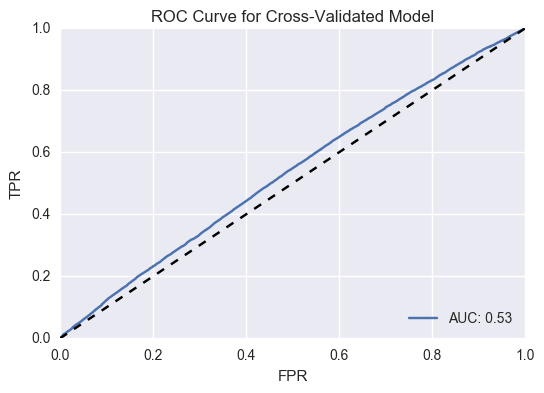

In [86]:
predict = model_selection.cross_val_predict(clf, X, y, cv=cv, method='predict_proba')
y_score = predict[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y, y_score)
print 'AUC:', metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC: {:.2}'.format(metrics.auc(fpr, tpr)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Cross-Validated Model')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right')
plt.show()

In [129]:
# thresholds for TPR of 80%, 85%, 90%, 95%, and 100%
thresh = [[th for t, f, th in zip(fpr, tpr, thresholds) if t >= i][0] for i in [0.35, 0.49]]

IndexError: list index out of range

In [181]:
# Print classification reports for each threshold corresponding to the TPRs above.
thresh = [0.1005,0.09,0.08,0.07,0.03]
for i in thresh:
    predictions = [1 if p >= i else 0 for p in yscore]
    print 'threshold:', i
    print metrics.classification_report(y, predictions)
    print ''

threshold: 0.1005


ValueError: Found input variables with inconsistent numbers of samples: [99353, 29806]

In [147]:
# Print confusion matrix for each threshold corresponding to the TPRs above.
for i in thresh:
    predictions = [1 if p >= i else 0 for p in yscore]
    print 'threshold:', i
    print metrics.confusion_matrix(y, predictions)
    print ''

threshold: 0.105
[[36096 51943]
 [ 3296  8018]]

threshold: 0.09
[[16220 71819]
 [ 1173 10141]]

threshold: 0.08
[[ 9021 79018]
 [  584 10730]]

threshold: 0.07
[[ 4383 83656]
 [  222 11092]]

threshold: 0.03
[[  306 87733]
 [    3 11311]]



In [111]:
# # confusion matrix
# actual_vs_cross_val_pred = pd.DataFrame([ypred, y]).transpose()
# actual_vs_cross_val_pred.columns = ['cross_val_pred', 'actual']
# pd.crosstab(actual_vs_cross_val_pred.cross_val_pred, actual_vs_cross_val_pred.actual)